# Cas Kaggle: 
## Preferències d'una persona en pelicules a partir de la seva personalitat.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

dataset0 = pd.read_csv("2018-personality-data.csv")
dataset0.drop(columns=dataset0.columns[-26:], axis=1, inplace=True)
dataset1 = pd.read_csv("2018_ratings.csv")
dataset1.drop(columns=dataset1.columns[-1], axis=1, inplace=True)

dataset1.head() 


,userid,movie_id,rating
0,8e7cebf9a234c064b75016249f2ac65e,1,5.0
1,8e7cebf9a234c064b75016249f2ac65e,2,4.0
2,8e7cebf9a234c064b75016249f2ac65e,3,4.0
3,8e7cebf9a234c064b75016249f2ac65e,5,5.0
4,8e7cebf9a234c064b75016249f2ac65e,6,4.0


In [2]:
dataset0.head()

,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition
0,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,high
1,77c7d756a093150d4377720abeaeef76,7.0,4.0,6.0,5.5,4.0,all,default
2,b7e8a92987a530cc368719a0e60e26a3,4.0,3.0,4.5,2.0,2.5,serendipity,medium
3,92561f21446e017dd6b68b94b23ad5b7,5.5,5.5,4.0,4.5,4.0,popularity,medium
4,030001ac2145a938b07e686a35a2d638,5.5,5.5,3.5,4.5,2.5,popularity,medium


In [3]:
dataset = pd.merge(dataset1, dataset0, on='userid')
dataset.rename(columns={' movie_id': 'movie_id', ' rating': 'rating', ' openness': 'openness', ' agreeableness': 'agreeableness', ' emotional_stability': 'emotional_stability', ' conscientiousness': 'conscentiousness', ' extraversion': 'extraversion', ' assigned metric': 'assigned metric', ' assigned condition': 'assigned condition'}, inplace=True)
dataset.head()

,userid,movie_id,rating,openness,agreeableness,emotional_stability,conscentiousness,extraversion,assigned metric,assigned condition
0,8e7cebf9a234c064b75016249f2ac65e,1,5.0,5.0,2.0,3.0,2.5,6.5,serendipity,high
1,8e7cebf9a234c064b75016249f2ac65e,2,4.0,5.0,2.0,3.0,2.5,6.5,serendipity,high
2,8e7cebf9a234c064b75016249f2ac65e,3,4.0,5.0,2.0,3.0,2.5,6.5,serendipity,high
3,8e7cebf9a234c064b75016249f2ac65e,5,5.0,5.0,2.0,3.0,2.5,6.5,serendipity,high
4,8e7cebf9a234c064b75016249f2ac65e,6,4.0,5.0,2.0,3.0,2.5,6.5,serendipity,high


In [4]:
print(dataset.columns.tolist())

['userid', 'movie_id', 'rating', 'openness', 'agreeableness', 'emotional_stability', 'conscentiousness', 'extraversion', 'assigned metric', 'assigned condition']


Ara que ja tenim les dades que considerem necesàries en un sol dataframe, el primer que farem serà passar els atributs 'assigned metric' i 'assigned condition' a valors numerics.

assigned metric: serendipity, popularity, diversity, all
asigned condition: high, medium, low, default

In [5]:
encoder = LabelBinarizer()
encoder.fit(dataset['assigned metric'])
transformed = encoder.transform(dataset['assigned metric'])
data0 = pd.DataFrame(transformed)
dataset = pd.concat([dataset, data0], axis=1).drop(['assigned metric'], axis=1)
dataset.rename(columns={0: 'all', 1: 'diversity', 2: 'popularity', 3: 'serendipity'}, inplace=True)
dataset.head()

,userid,movie_id,rating,openness,agreeableness,emotional_stability,conscentiousness,extraversion,assigned condition,all,diversity,popularity,serendipity
0,8e7cebf9a234c064b75016249f2ac65e,1,5.0,5.0,2.0,3.0,2.5,6.5,high,0,0,0,1
1,8e7cebf9a234c064b75016249f2ac65e,2,4.0,5.0,2.0,3.0,2.5,6.5,high,0,0,0,1
2,8e7cebf9a234c064b75016249f2ac65e,3,4.0,5.0,2.0,3.0,2.5,6.5,high,0,0,0,1
3,8e7cebf9a234c064b75016249f2ac65e,5,5.0,5.0,2.0,3.0,2.5,6.5,high,0,0,0,1
4,8e7cebf9a234c064b75016249f2ac65e,6,4.0,5.0,2.0,3.0,2.5,6.5,high,0,0,0,1


In [6]:
encoder = LabelBinarizer()
encoder.fit(dataset['assigned condition'])
transformed = encoder.transform(dataset['assigned condition'])
data0 = pd.DataFrame(transformed)
dataset = pd.concat([dataset, data0], axis=1).drop(['assigned condition'], axis=1)
dataset.rename(columns={0: 'default', 1: 'high', 2: 'low', 3: 'medium'}, inplace=True)
dataset.drop(["default", "userid"], axis=1, inplace=True)

dataset.head()

,movie_id,rating,openness,agreeableness,emotional_stability,conscentiousness,extraversion,all,diversity,popularity,serendipity,high,low,medium
0,1,5.0,5.0,2.0,3.0,2.5,6.5,0,0,0,1,1,0,0
1,2,4.0,5.0,2.0,3.0,2.5,6.5,0,0,0,1,1,0,0
2,3,4.0,5.0,2.0,3.0,2.5,6.5,0,0,0,1,1,0,0
3,5,5.0,5.0,2.0,3.0,2.5,6.5,0,0,0,1,1,0,0
4,6,4.0,5.0,2.0,3.0,2.5,6.5,0,0,0,1,1,0,0


Com l'únic que ens interessa de la persona són les dades sobre la seva personalitat, ens hem desfet del userId. També ens hem desfet de l'atribut default ja que és el mateix que l'atribut all.

També, passem l'atribut objectiu 'rating' a ints, per poder-los utilitzar com a classes, i així convertint-ho en un problema de classificació.

In [7]:
dataset = dataset.replace({'rating': {0.5: 1, 1: 2, 1.5: 3, 2: 4, 2.5: 5, 3: 6, 3.5: 7, 4: 8, 4.5: 9, 5: 10}})
dataset = dataset.astype({'rating':'int'})

data = dataset.values
x = data[:, np.array([True, False, True, True, True, True, True, True, True, True, True, True, True, True])]
y = data[:, 1]

dataset.head()

,movie_id,rating,openness,agreeableness,emotional_stability,conscentiousness,extraversion,all,diversity,popularity,serendipity,high,low,medium
0,1,10,5.0,2.0,3.0,2.5,6.5,0,0,0,1,1,0,0
1,2,8,5.0,2.0,3.0,2.5,6.5,0,0,0,1,1,0,0
2,3,8,5.0,2.0,3.0,2.5,6.5,0,0,0,1,1,0,0
3,5,10,5.0,2.0,3.0,2.5,6.5,0,0,0,1,1,0,0
4,6,8,5.0,2.0,3.0,2.5,6.5,0,0,0,1,1,0,0


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070203 entries, 0 to 1070202
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   movie_id             1070203 non-null  int64  
 1   rating               1070203 non-null  int32  
 2   openness             1070203 non-null  float64
 3   agreeableness        1070203 non-null  float64
 4   emotional_stability  1070203 non-null  float64
 5   conscentiousness     1070203 non-null  float64
 6   extraversion         1070203 non-null  float64
 7   all                  1070203 non-null  int32  
 8   diversity            1070203 non-null  int32  
 9   popularity           1070203 non-null  int32  
 10  serendipity          1070203 non-null  int32  
 11  high                 1070203 non-null  int32  
 12  low                  1070203 non-null  int32  
 13  medium               1070203 non-null  int32  
dtypes: float64(5), int32(8), int64(1)
memory usage: 89

In [9]:
dataset.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,movie_id,rating,openness,agreeableness,emotional_stability,conscentiousness,extraversion,all,diversity,popularity,serendipity,high,low,medium
count,1070203.00,1070203.00,1070203.00,1070203.00,1070203.00,1070203.00,1070203.00,1070203.00,1070203.00,1070203.00,1070203.00,1070203.00,1070203.00,1070203.00
mean,41890.69,6.73,5.36,4.20,4.59,4.70,3.41,0.14,0.27,0.30,0.29,0.29,0.29,0.28
std,48530.99,2.00,1.05,1.18,1.37,1.27,1.44,0.35,0.44,0.46,0.45,0.45,0.45,0.45
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2706.00,6.00,4.50,3.50,3.50,4.00,2.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,7982.00,7.00,5.50,4.00,4.50,4.50,3.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,78342.00,8.00,6.00,5.00,5.50,5.50,4.50,0.00,1.00,1.00,1.00,1.00,1.00,1.00
max,198117.00,10.00,7.00,7.00,7.00,7.00,7.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### Heatmaps + Pairplots

<AxesSubplot:>

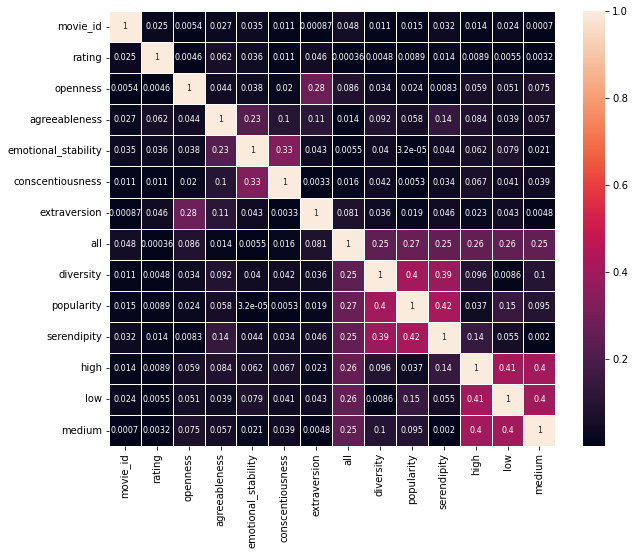

In [10]:
co = dataset.corr()
plt.figure(figsize=[10, 8])
sns.heatmap(np.abs(co), annot=True, linewidths=0.5, annot_kws={"size":8})

array([[<AxesSubplot:title={'center':'movie_id'}>,
        <AxesSubplot:title={'center':'rating'}>,
        <AxesSubplot:title={'center':'openness'}>,
        <AxesSubplot:title={'center':'agreeableness'}>],
       [<AxesSubplot:title={'center':'emotional_stability'}>,
        <AxesSubplot:title={'center':'conscentiousness'}>,
        <AxesSubplot:title={'center':'extraversion'}>,
        <AxesSubplot:title={'center':'all'}>],
       [<AxesSubplot:title={'center':'diversity'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'serendipity'}>,
        <AxesSubplot:title={'center':'high'}>],
       [<AxesSubplot:title={'center':'low'}>,
        <AxesSubplot:title={'center':'medium'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

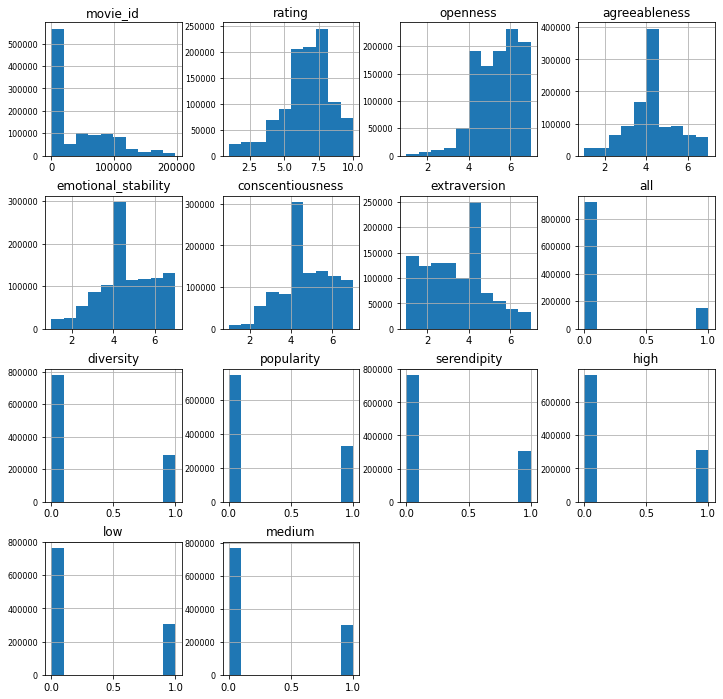

In [11]:
dataset.hist(figsize=[12, 12], ylabelsize=8, )
#rel = sns.pairplot(dataset)

### Normalització + Crossvalidation

Primer escollirem el tipus de normalització que volem utilitzar en el nostre dataset entre aquestes 8 opcions: Sense Normalització, Minmax Scaler, Standard Scaler, Robust Scaler, Yeo-Johnson Scaler (PowerTransformer), Quantile Transformer (Uniform), Quantile Transformer (Gaussian), Normalizer. Per mesurar quina normalització és la millor, els hi aplicarem una simple regressió logistica i veurem quina dona una millor accuracy. 

In [12]:
dataset['rating'].value_counts()

8     244915
7     210273
6     206606
9     103109
5      89968
10     72821
4      68328
2      26729
3      25817
1      21637
Name: rating, dtype: int64

Com es pot veure les dades están desbalançejades, ja que hi ha aproximadament 11 vegades més instáncies en ratings de 8 que en ratings de 1, i per lo tant utilitzaré un stratified k-fold.

In [13]:
import sklearn.preprocessing
import sklearn.linear_model
import sklearn.model_selection
from statistics import mean

x = x.astype(float)
y = y.astype(float)

minmax = sklearn.preprocessing.MinMaxScaler()

standard = sklearn.preprocessing.StandardScaler()

robust = sklearn.preprocessing.RobustScaler()

yeoJohnson = sklearn.preprocessing.PowerTransformer()

quantileUniform = sklearn.preprocessing.QuantileTransformer()

quantileGaussian = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')

normalizer = sklearn.preprocessing.Normalizer()


logReg = sklearn.linear_model.LogisticRegression(max_iter=1000)

skf = sklearn.model_selection.StratifiedKFold(n_splits=5, shuffle=True)
accuracy_sense = []
accuracy_minmax = []
accuracy_standard = []
accuracy_robust = []
accuracy_yeoJohnson = []
accuracy_quantUniform = []
accuracy_quantGaussian = []
accuracy_normalizer = []

'''
#Sense normalització
for train_index, test_index in skf.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    logReg.fit(x_train, y_train)
    accuracy_sense.append(logReg.score(x_test, y_test))

print('\nSense Scaler:')
print('\nMaximum Accuracy that can be obtained from this model is:',
      max(accuracy_sense)*100, '%')
print('\nMinimum Accuracy:',
      min(accuracy_sense)*100, '%')
print('\nOverall Accuracy:',
      mean(accuracy_sense)*100, '%')
    

#MinMax

for train_index, test_index in skf.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    x_train = minmax.fit_transform(x_train)
    x_test = minmax.transform(x_test)
    
    y_train, y_test = y[train_index], y[test_index]
    logReg.fit(x_train, y_train)
    accuracy_minmax.append(logReg.score(x_test, y_test))

print('\nMinMax Scaler')
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(accuracy_minmax)*100, '%')
print('\nMinimum Accuracy:',
      min(accuracy_minmax)*100, '%')
print('\nOverall Accuracy:',
      mean(accuracy_minmax)*100, '%')


#Standard_Scaler

for train_index, test_index in skf.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    x_train = standard.fit_transform(x_train)
    x_test = standard.transform(x_test)
    logReg.fit(x_train, y_train)
    accuracy_standard.append(logReg.score(x_test, y_test))

print('\nStandard Scaler:')
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(accuracy_standard)*100, '%')
print('\nMinimum Accuracy:',
      min(accuracy_standard)*100, '%')
print('\nOverall Accuracy:',
      mean(accuracy_standard)*100, '%')

#Robust_Scaler

for train_index, test_index in skf.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    
    x_train = robust.fit_transform(x_train)
    x_test = robust.transform(x_test)
    
    y_train, y_test = y[train_index], y[test_index]
    logReg.fit(x_train, y_train)
    accuracy_robust.append(logReg.score(x_test, y_test))

print('\nRobust Scaler:')
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(accuracy_robust)*100, '%')
print('\nMinimum Accuracy:',
      min(accuracy_robust)*100, '%')
print('\nOverall Accuracy:',
      mean(accuracy_robust)*100, '%')
'''

#Yeo-Johson

for train_index, test_index in skf.split(x, y):   
    x_train, x_test = x[train_index], x[test_index]
    
    x_train = yeoJohnson.fit_transform(x_train)
    x_test = yeoJohnson.transform(x_test)
    
    y_train, y_test = y[train_index], y[test_index]
    logReg.fit(x_train, y_train)
    accuracy_yeoJohnson.append(logReg.score(x_test, y_test))

print('\nYeo-Johnson Scaler:')
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(accuracy_yeoJohnson)*100, '%')
print('\nMinimum Accuracy:',
      min(accuracy_yeoJohnson)*100, '%')
print('\nOverall Accuracy:',
      mean(accuracy_yeoJohnson)*100, '%')

'''
#Quantile Transformer (Uniform)

for train_index, test_index in skf.split(x, y):   
    x_train, x_test = x[train_index], x[test_index]
    
    x_train = quantileUniform.fit_transform(x_train)
    x_test = quantileUniform.transform(x_test)
    
    y_train, y_test = y[train_index], y[test_index]
    logReg.fit(x_train, y_train)
    accuracy_quantUniform.append(logReg.score(x_test, y_test))

print('\nQuantile Transformer (Uniform):')
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(accuracy_quantUniform)*100, '%')
print('\nMinimum Accuracy:',
      min(accuracy_quantUniform)*100, '%')
print('\nOverall Accuracy:',
      mean(accuracy_quantUniform)*100, '%')


#Quantile Transformer (Gaussian)

for train_index, test_index in skf.split(x, y):   
    x_train, x_test = x[train_index], x[test_index]
    
    x_train = quantileGaussian.fit_transform(x_train)
    x_test = quantileGaussian.transform(x_test)
    
    y_train, y_test = y[train_index], y[test_index]
    logReg.fit(x_train, y_train)
    accuracy_quantGaussian.append(logReg.score(x_test, y_test))

print('\nQuantile Transformer (Gaussian):')
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(accuracy_quantGaussian)*100, '%')
print('\nMinimum Accuracy:',
      min(accuracy_quantGaussian)*100, '%')
print('\nOverall Accuracy:',
      mean(accuracy_quantGaussian)*100, '%')



#Normalizer

for train_index, test_index in skf.split(x, y):   
    x_train, x_test = x[train_index], x[test_index]
    
    x_train = normalizer.fit_transform(x_train)
    x_test = normalizer.transform(x_test)
    
    y_train, y_test = y[train_index], y[test_index]
    logReg.fit(x_train, y_train)
    accuracy_normalizer.append(logReg.score(x_test, y_test))

print('\nNormalizer:')
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(accuracy_normalizer)*100, '%')
print('\nMinimum Accuracy:',
      min(accuracy_normalizer)*100, '%')
print('\nOverall Accuracy:',
      mean(accuracy_normalizer)*100, '%')
'''


Yeo-Johnson Scaler:

Maximum Accuracy That can be obtained from this model is: 23.61463457935629 %

Minimum Accuracy: 23.497009904690714 %

Overall Accuracy: 23.54917705704085 %


"\n#Quantile Transformer (Uniform)\n\nfor train_index, test_index in skf.split(x, y):   \n    x_train, x_test = x[train_index], x[test_index]\n    \n    x_train = quantileUniform.fit_transform(x_train)\n    x_test = quantileUniform.transform(x_test)\n    \n    y_train, y_test = y[train_index], y[test_index]\n    logReg.fit(x_train, y_train)\n    accuracy_quantUniform.append(logReg.score(x_test, y_test))\n\nprint('\nQuantile Transformer (Uniform):')\nprint('\nMaximum Accuracy That can be obtained from this model is:',\n      max(accuracy_quantUniform)*100, '%')\nprint('\nMinimum Accuracy:',\n      min(accuracy_quantUniform)*100, '%')\nprint('\nOverall Accuracy:',\n      mean(accuracy_quantUniform)*100, '%')\n\n\n#Quantile Transformer (Gaussian)\n\nfor train_index, test_index in skf.split(x, y):   \n    x_train, x_test = x[train_index], x[test_index]\n    \n    x_train = quantileGaussian.fit_transform(x_train)\n    x_test = quantileGaussian.transform(x_test)\n    \n    y_train, y_test = 

La que ha donat millor resultat ha sigut la normalització Yeo-Johnson, per lo tant comentaré totes les altres perque s'executi més rapid, i mostraré els resultats obtinguts amb els altres tipus de normalització a la memória.

### PCA

In [14]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=dataset.shape[1])
pca.fit(dataset)

print(pca.explained_variance_ratio_)
print(pca.components_)

[9.99999994e-01 1.70695551e-09 1.06804202e-09 9.29424824e-10
 5.45862945e-10 4.69230293e-10 4.01779347e-10 1.36217455e-10
 1.24456825e-10 1.10448346e-10 1.08044739e-10 8.32043849e-11
 1.07961271e-41 6.21114366e-42]
[[ 1.00000000e+00 -1.03227564e-06 -1.17613013e-07 -6.45740044e-07
  -9.84852041e-07 -2.92524273e-07 -2.57577618e-08  3.41619705e-07
   9.97504761e-08 -1.42925795e-07 -2.98444386e-07 -1.27122898e-07
  -2.20974767e-07  6.47796065e-09]
 [-1.13388870e-06 -9.92237576e-01 -1.70587482e-02 -7.01825757e-02
  -6.11927394e-02 -7.31730049e-03 -7.98606603e-02 -1.20555390e-03
  -1.98166519e-03 -2.95536148e-03  6.14258057e-03  4.02380625e-03
  -1.70054628e-03 -1.11770606e-03]
 [-9.40747540e-07  1.03775474e-01 -1.44355217e-01 -3.48005103e-01
  -6.74569256e-01 -4.90889530e-01 -3.86023979e-01 -7.34956470e-03
  -1.49656901e-02 -7.09239702e-03  2.94076518e-02  2.78542467e-02
  -1.63665629e-02 -4.13811917e-03]
 [-4.10939333e-07 -5.03474943e-02  3.17963253e-01 -1.05718324e-03
  -3.16701310e-01 -3

El que podem observar en els resultats del PCA es que el primer Principal Component és basicament l'unic que importa ja que te moltíssima més variancia que el segon i els altres, i que l'atribut que aporta la majoria de variancia a aquest primer principal component és el movie_id.

### Feature Selection

In [15]:
'''
from sklearn.feature_selection import RFE

selector = RFE(logReg, n_features_to_select=10)
selector = selector.fit(x, y)
selector.support_
x_train = selector.transform(x_train)
x_test = selector.transform(x_test)
logReg.fit(x_train, y_train)
print(logReg.score(x_test, y_test))
'''

'\nfrom sklearn.feature_selection import RFE\n\nselector = RFE(logReg, n_features_to_select=10)\nselector = selector.fit(x, y)\nselector.support_\nx_train = selector.transform(x_train)\nx_test = selector.transform(x_test)\nlogReg.fit(x_train, y_train)\nprint(logReg.score(x_test, y_test))\n'

He provat de fer feature selection amb el wrapper RFE, pero el resultat ha donat pitjor del que teniem abans (per lo tant ho comentarem ja que tarda 12 minuts en acabar). També provaré intrinsic feature selection, pero ho faré en la model selection provant el random forest classifier.

### Outlier Removal

Hem provat diferents algoritmes d'outlier removal amb l'esperança de millorar l'accuracy i de reduïr la mida de les dades. Aquests algoritmes son: Isolation Forest, OneClassSvm, OneClassSvm(polynomial), LocalOutlierFactor, LocalOutlierFactor(BallTree) i Elliptic Envelope. (Com han tardat molt en executar-se i tots han donat una accuracy pitjor a la que teniem amb outliers, els deixem comentats, i mostrem els resultats a la memòria). 

Primer observem les dades amb histogrames ara que ja estan normalitzades.

array([[<AxesSubplot:title={'center':'movie_id'}>,
        <AxesSubplot:title={'center':'openness'}>,
        <AxesSubplot:title={'center':'agreeableness'}>,
        <AxesSubplot:title={'center':'emotional_stability'}>],
       [<AxesSubplot:title={'center':'conscentiousness'}>,
        <AxesSubplot:title={'center':'extraversion'}>,
        <AxesSubplot:title={'center':'all'}>,
        <AxesSubplot:title={'center':'diversity'}>],
       [<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'serendipity'}>,
        <AxesSubplot:title={'center':'high'}>,
        <AxesSubplot:title={'center':'low'}>],
       [<AxesSubplot:title={'center':'medium'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

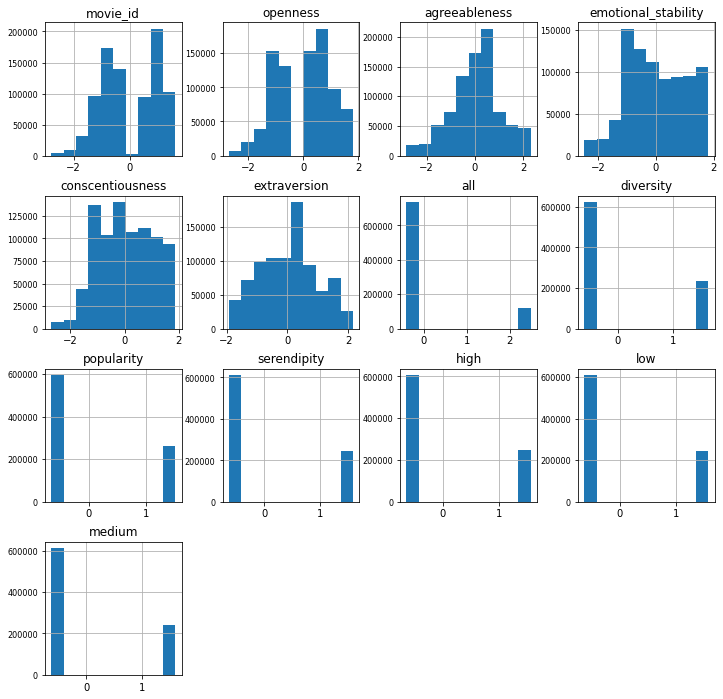

In [16]:
df2 = pd.DataFrame(x_train, columns = ['movie_id','openness','agreeableness','emotional_stability','conscentiousness','extraversion','all','diversity','popularity','serendipity','high','low','medium'])
df2.hist(figsize=[12, 12], ylabelsize=8, )

In [17]:
'''
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope

isoForest = IsolationForest()
svm = OneClassSVM()
svmPoly = OneClassSVM(kernel="poly")
localOutlier = LocalOutlierFactor()
localBallTree = LocalOutlierFactor(algorithm="ball_tree")
ellipEnvelope = EllipticEnvelope()

outliersIso = isoForest.fit_predict(x_train)
outliersSvm = svm.fit_predict(x_train)
outliersSvmPoly = svmPoly.fit_predict(x_train)
outliersLocal = localOutlier.fit_predict(x_train)
outliersBallTree = localBallTree.fit_predict(x_train)
outliersElliptic = ellipEnvelope.fit_predict(x_train)


print(f"Shape amb outliers: {x_train.shape}")
x_trainIso = x_train[outliersIso == 1]
y_trainIso = y_train[outliersIso == 1]
print(f"Shape després de IsolationForest: {x_trainIso.shape}")
x_trainSvm = x_train[outliersSvm == 1]
y_trainSvm = y_train[outliersSvm == 1]
print(f"Shape després de OneClassSVM(rbf): {x_trainSvm.shape}")
x_trainSvmPoly = x_train[outliersSvmPoly == 1]
y_trainSvmPoly = y_train[outliersSvmPoly == 1]
print(f"Shape després de OneClassSVM(poly): {x_trainSvmPoly.shape}")
x_trainLocal = x_train[outliersLocal == 1]
y_trainLocal = y_train[outliersLocal == 1]
print(f"Shape després de LocalOutlierFactor(auto): {x_trainLocal.shape}")
x_trainBallTree = x_train[outliersBallTree == 1]
y_trainBallTree = y_train[outliersBallTree == 1]
print(f"Shape després de LocalOutlierFactor(ball_tree): {x_trainBallTree.shape}")
x_trainElliptic = x_train[outliersElliptic == 1]
y_trainElliptic = y_train[outliersElliptic == 1]
print(f"Shape després de EllipticEnvelope: {x_trainElliptic.shape}")
'''


c:\Users\gerar\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:738: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(
c:\Users\gerar\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-72.188101068612184 > -74.430648065154372). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
c:\Users\gerar\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-72.606195370250077 > -74.180447167386603). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
c:\Users\gerar\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happe

Shape amb outliers: (856163, 13)
Shape després de IsolationForest: [[-2.29390887  0.02481758  1.09561465 ... -0.64021415 -0.63441059
   1.59171486]
 [-2.24654542  0.02481758  1.09561465 ... -0.64021415 -0.63441059
   1.59171486]
 [-2.18213488  0.02481758  1.09561465 ... -0.64021415 -0.63441059
   1.59171486]
 ...
 [ 1.26801083 -1.29629042 -0.58119474 ...  1.56197735 -0.63441059
  -0.62825323]
 [ 1.28966829 -1.29629042 -0.58119474 ...  1.56197735 -0.63441059
  -0.62825323]
 [ 1.30970714 -1.29629042 -0.58119474 ...  1.56197735 -0.63441059
  -0.62825323]]
Shape després de OneClassSVM(rbf): [[-0.4726181   1.81040239 -0.15401727 ... -0.64021415 -0.63441059
  -0.62825323]
 [-0.47189576  1.81040239 -0.15401727 ... -0.64021415 -0.63441059
  -0.62825323]
 [-0.46686609  1.81040239 -0.15401727 ... -0.64021415 -0.63441059
  -0.62825323]
 ...
 [ 1.26801083 -1.29629042 -0.58119474 ...  1.56197735 -0.63441059
  -0.62825323]
 [ 1.28966829 -1.29629042 -0.58119474 ...  1.56197735 -0.63441059
  -0.628253

In [18]:
'''
logReg.fit(x_trainIso, y_trainIso)
print(f"Accuracy amb IsolationForest: {logReg.score(x_test, y_test)}")

logReg.fit(x_trainSvm, y_trainSvm)
print(f"Accuracy amb OneClassSVM(rbf): {logReg.score(x_test, y_test)}")

logReg.fit(x_trainSvmPoly, y_trainSvmPoly)
print(f"Accuracy amb OneClassSVM(poly): {logReg.score(x_test, y_test)}")

logReg.fit(x_trainLocal, y_trainLocal)
print(f"Accuracy amb LocalOutlierFactor(auto): {logReg.score(x_test, y_test)}")

logReg.fit(x_trainBallTree, y_trainBallTree)
print(f"Accuracy amb LocalOutlierFactor(ball_tree): {logReg.score(x_test, y_test)}")

logReg.fit(x_trainElliptic, y_trainElliptic)
print(f"Accuracy amb EllipticEnvelope: {logReg.score(x_test, y_test)}")
'''

Accuracy amb IsolationForest: 0.22290693328349842
Accuracy amb OneClassSVM(rbf): 0.22703233040553167
Accuracy amb OneClassSVM(poly): 0.23221360493365725
Accuracy amb LocalOutlierFactor(auto): 0.23443748831994018
Accuracy amb LocalOutlierFactor(ball_tree): 0.23443748831994018
Accuracy amb EllipticEnvelope: 0.2333769388899271


In [21]:
'''
print(f"Shape amb outliers: {x_train.shape}")
x_trainIso = x_train[outliersIso == 1]
y_trainIso = y_train[outliersIso == 1]
print(f"Shape després de IsolationForest: {x_trainIso.shape}")
x_trainSvm = x_train[outliersSvm == 1]
y_trainSvm = y_train[outliersSvm == 1]
print(f"Shape després de OneClassSVM(rbf): {x_trainSvm.shape}")
x_trainSvmPoly = x_train[outliersSvmPoly == 1]
y_trainSvmPoly = y_train[outliersSvmPoly == 1]
print(f"Shape després de OneClassSVM(poly): {x_trainSvmPoly.shape}")
x_trainLocal = x_train[outliersLocal == 1]
y_trainLocal = y_train[outliersLocal == 1]
print(f"Shape després de LocalOutlierFactor(auto): {x_trainLocal.shape}")
x_trainBallTree = x_train[outliersBallTree == 1]
y_trainBallTree = y_train[outliersBallTree == 1]
print(f"Shape després de LocalOutlierFactor(ball_tree): {x_trainBallTree.shape}")
x_trainElliptic = x_train[outliersElliptic == 1]
y_trainElliptic = y_train[outliersElliptic == 1]
print(f"Shape després de EllipticEnvelope: {x_trainElliptic.shape}")
'''

Shape amb outliers: (856163, 13)
Shape després de IsolationForest: (299960, 13)
Shape després de OneClassSVM(rbf): (428083, 13)
Shape després de OneClassSVM(poly): (428091, 13)
Shape després de LocalOutlierFactor(auto): (818733, 13)
Shape després de LocalOutlierFactor(ball_tree): (818733, 13)
Shape després de EllipticEnvelope: (770646, 13)


### Model Selection

Hem provat 